In [4]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml
import pickle

print('Chargement des données...')
# Charger le dataset "digits"
#digits = load_digits()
#x, y = digits['data'], digits['target']
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist['data'], mnist['target']

#Normalisation
x = x/255

# Division des données en train et test
print('Séparation des données en train et test...')
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size = 60000,test_size=10000, random_state=42
)

# Normalisation
print("Normalisation")
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test) 

print('Entrainement du modèle...')
# Construction du pipeline pour normalisation et SVM
model = SVC(C=5, kernel='rbf', gamma=0.001)
model.fit(x_train, y_train)
print("Fin de l'entrainement")

# Évaluation du modèle avec cross-validation
#scores = cross_val_score(model, x_train, y_train, cv=5)
#print("Scores de validation croisée : ", scores)
#print("Score moyen : ", scores.mean())
#print(x_test.shape)
#print(y_test)

print("sauvegarde du modèle")

 
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))



Chargement des données...


C:\Users\gadeu\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Séparation des données en train et test...
Normalisation
Entrainement du modèle...
Fin de l'entrainement
sauvegarde du modèle


In [9]:
import pickle
import numpy as np
filename = 'finalized_model.sav'
model = pickle.load(open(filename, 'rb'))

#recupérons les coefficients du svm à noyau RBF
#vecteurs de supports
vecteurs_supports = model.support_vectors_
#coefficients de chaque classe
coefficients = model.dual_coef_
#le bias
biais = model.intercept_

print("vecteurs de support:\n",vecteurs_supports)
print("taille")
print(vecteurs_supports.shape)
print("coefficients:\n",coefficients)
print("bias:\n",biais)

np.savetxt("vecteurs_support.txt",vecteurs_supports)
np.savetxt("coefficients.txt",coefficients)
np.savetxt("biais.txt",biais)





vecteurs de support:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
taille
(14447, 784)
coefficients:
 [[ 0.          0.          0.         ... -0.         -0.
  -0.        ]
 [ 0.          0.          5.         ... -0.         -0.
  -1.36754528]
 [ 0.          0.          0.         ... -0.         -5.
  -0.        ]
 ...
 [ 0.          0.          0.         ... -0.         -0.
  -0.        ]
 [ 0.          0.          0.         ... -0.         -0.
  -0.        ]
 [ 0.          0.          0.         ... -5.         -1.94299199
  -0.        ]]
bias:
 [ 0.57638115 -1.21452115 -0.5318417   0.56271783 -1.76393478  0.28083969
 -0.62770402  0.78785975  0.16280448 -2.28095315 -2.28961069  1.06946806
 -2.38327103  0.11461234 -0.61678807  3.06534261  0.5414132   1.13914563
  2.14828731 -0.46636981  3.21276464  1.85501112  6.72823034  2.02431663
  2.07028918 -2.90094214  1.65704444

Label réel: 5
Label prédit: 5


C:\Users\gadeu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


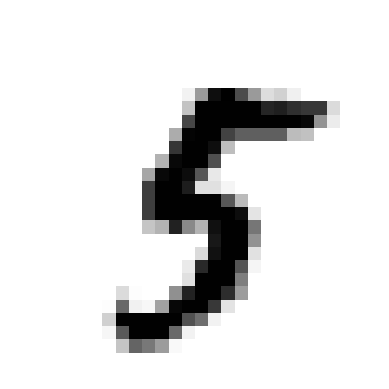

In [11]:
prediction_index = 65
true_label = y_test.iloc[prediction_index]  # Conversion en tableau NumPy
#true_label = y_test[prediction_index]  # Conversion en tableau NumPy
example = x_test.iloc[prediction_index]

predicted_label = model.predict([example])[0]
print(f"Label réel: {true_label}")
print(f"Label prédit: {predicted_label}")

# Affichage de l'image associée
#example_image = example.reshape(28, 28)
#plt.imshow(example_image, cmap="binary", interpolation='nearest')
#plt.axis("off")
#plt.show()

# Affichage d'une image d'exemple
plt.imshow(np.array(example).reshape(28, 28), cmap="binary", interpolation='nearest')
plt.axis("off")

plt.show()